## Import data from Kaggle

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## EDA

In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.duplicated().sum()

418

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

Equal distribution of the 2 classes in the data

## Creating a sample of 15k data points for modeling considering computer resources

In [10]:
df1=df.sample(15000,random_state=2)
df1.reset_index(inplace=True)

In [11]:
len(df1)

15000

In [12]:
df1.head()

,index,review,sentiment
0,36687,After seeing the DVD release of the Blues Brot...,negative
1,49854,Viewed this GREAT Classic film of Greta Garbo ...,positive
2,44858,I really liked the movie. I remember reading i...,positive
3,20198,"If you enjoy films like American Pie, Road Tri...",negative
4,21991,Thomas Edison had no other reason to make this...,negative


In [13]:
df1['sentiment'].value_counts()

negative    7562
positive    7438
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

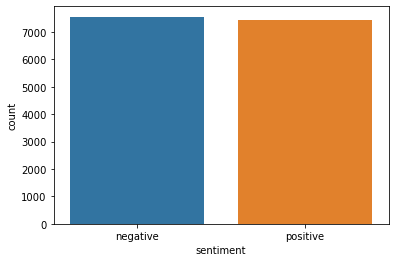

In [14]:
sns.countplot(x=df1['sentiment'],data=df1)

## Data cleaning

In [15]:

df1.drop(columns=['index'],inplace=True)

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# print(stopwords.words('english'))

In [17]:
def data_cleaning(text):
    t=text.lower()
    ##remove hyperlinks##
    r1 = re.compile('<.*?>') 
    t = re.sub(r1, '', t)
    ##remove websites links
    t=re.sub(r'http\S+', '', t)
    ##remove special characters and digits
    t=re.sub(r'[^A-Za-z0-9]+', ' ', t)
    t=re.sub(r'[0-9]+', '', t) 
    ##remove stop words and applying stemming##
    x=[]
    ps = PorterStemmer()
    for i in t.split():
        if i not in stopwords.words('english'):            
            x.append(ps.stem(i))
    x= " ".join(x) 
    
    
    
    
    return x
    

In [18]:
df1['review_clean']=df1['review'].apply(data_cleaning)

In [19]:
df1.head()

,review,sentiment,review_clean
0,After seeing the DVD release of the Blues Brot...,negative,see dvd releas blue brother mention wire belus...
1,Viewed this GREAT Classic film of Greta Garbo ...,positive,view great classic film greta garbo thought pe...
2,I really liked the movie. I remember reading i...,positive,realli like movi rememb read sever time kid gl...
3,"If you enjoy films like American Pie, Road Tri...",negative,enjoy film like american pie road trip van wil...
4,Thomas Edison had no other reason to make this...,negative,thoma edison reason make film except show film...


In [120]:
# !pip install wordcloud

In [20]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [21]:
negaive_wc = wc.generate(df1[df1['sentiment'] == 'negative']['review_clean'].str.cat(sep=" "))

In [22]:
import matplotlib.pyplot as plt

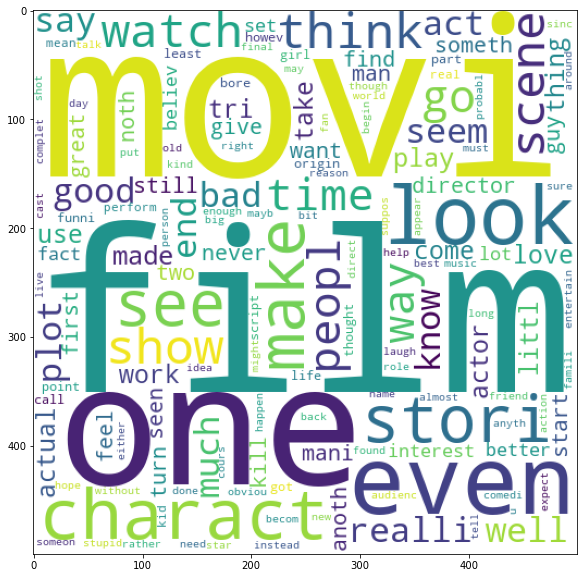

In [23]:
##negative words##
plt.figure(figsize=(30,10))
plt.imshow(negaive_wc)

In [24]:
positive_wc = wc.generate(df1[df1['sentiment'] == 'positive']['review_clean'].str.cat(sep=" "))

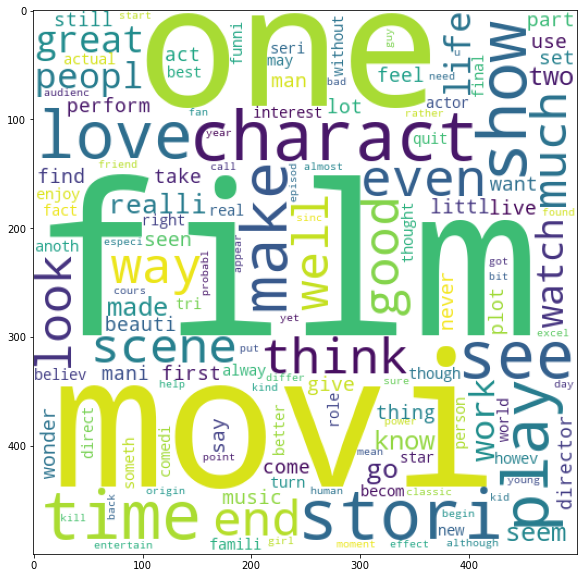

In [25]:
##negative words##
plt.figure(figsize=(30,10))
plt.imshow(positive_wc)

In [26]:
X = df1['review_clean']
y = df1['sentiment']

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
enc = LabelEncoder()

In [29]:
Y=enc.fit_transform(y)

In [30]:
print(Y.shape)
print(X.shape)

(15000,)
(15000,)


## Model Train-Test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

In [33]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (10500,)
X_test (4500,)
y_train (10500,)
y_test (4500,)


In [34]:
X_train.head()

11797    aspect film save least favorit piec celluloid ...
5899     say movi realli quit aw act averag pace movi t...
9513     extrem talent black director spike lee carl fr...
1572     approach movi understand one worst flick ever ...
12995    found say time time remark inept rd act sorri ...
Name: review_clean, dtype: object

## Bag of words/TFIDF

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(max_features=5)
# X = vectorizer.fit_transform(df_list)
# vectorizer.get_feature_names_out()
# X.toarray()

In [36]:
vectorizer = TfidfVectorizer(max_features=10000)

In [37]:
X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()

In [38]:
print('X_train_bow',X_train_bow.shape)
print('X_test_bow',X_test_bow.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train_bow (10500, 10000)
X_test_bow (4500, 10000)
y_train (10500,)
y_test (4500,)


## Random Forest Model training

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [40]:

rf = RandomForestClassifier()
rf.fit(X_train_bow ,y_train )



RandomForestClassifier()

In [41]:
y_pred_train=rf.predict(X_train_bow)
y_pred_test=rf.predict(X_test_bow)



In [42]:
print('Train accuracy: \n',accuracy_score(y_train,y_pred_train))
print('Test accuracy: \n',accuracy_score(y_test,y_pred_test))
print('Train Confusion matrix: \n',confusion_matrix(y_train,y_pred_train))
print('Test Confusion matrix: \n',confusion_matrix(y_test,y_pred_test))

Train accuracy: 
 1.0
Test accuracy: 
 0.838
Train Confusion matrix: 
 [[5256    0]
 [   0 5244]]
Test Confusion matrix: 
 [[1944  362]
 [ 367 1827]]


Above model overfits

## RF Hyperparameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
rf=RandomForestClassifier(random_state=42)

In [45]:
param_grid = { 
    'n_estimators': [100, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [4,8],
    'criterion' :['gini', 'entropy']
}

In [46]:
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train_bow ,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 500]})

In [47]:
CV_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

In [49]:
y_pred_train=CV_rf.predict(X_train_bow)
y_pred_test=CV_rf.predict(X_test_bow)



In [50]:
print('Train accuracy: \n',accuracy_score(y_train,y_pred_train))
print('Test accuracy: \n',accuracy_score(y_test,y_pred_test))
print('Train Confusion matrix: \n',confusion_matrix(y_train,y_pred_train))
print('Test Confusion matrix: \n',confusion_matrix(y_test,y_pred_test))

Train accuracy: 
 0.8877142857142857
Test accuracy: 
 0.8295555555555556
Train Confusion matrix: 
 [[4389  867]
 [ 312 4932]]
Test Confusion matrix: 
 [[1798  508]
 [ 259 1935]]


## XGBoost

In [83]:
import xgboost as xgb

In [68]:
xgb_model = xgb.XGBClassifier( random_state=42)
# xgb_model.fit(X, y)
xgb_model.fit(X_train_bow ,y_train)



C:\Users\syednajme\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_pred_train=xgb_model.predict(X_train_bow)
y_pred_test=xgb_model.predict(X_test_bow)


In [73]:
xgb_model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [71]:
print('Train accuracy: \n',accuracy_score(y_train,y_pred_train))
print('Test accuracy: \n',accuracy_score(y_test,y_pred_test))
print('Train Confusion matrix: \n',confusion_matrix(y_train,y_pred_train))
print('Test Confusion matrix: \n',confusion_matrix(y_test,y_pred_test))

Train accuracy: 
 0.973
Test accuracy: 
 0.8366666666666667
Train Confusion matrix: 
 [[3341  131]
 [  58 3470]]
Test Confusion matrix: 
 [[1185  265]
 [ 225 1325]]


Above model overfits

## Hyperparameter tuning in XGBoost

In [84]:
parameters1 = {
              
              'learning_rate': [0.5,0.3], #so called `eta` value
              'max_depth': [6,8,10]
              
              }

Limited hyperparameters are trained due to computer resource constraints

In [81]:
xgb_model = xgb.XGBClassifier()




In [82]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
CV_xg = GridSearchCV(estimator=xgb_model, param_grid=parameters1, cv= 5)
CV_xg.fit(X_train_bow ,y_train)

[18:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             param_grid={'learning_rate': [0.5, 0.3], 'max_depth': [6, 8, 10]})

In [86]:
CV_xg.best_params_

{'learning_rate': 0.3, 'max_depth': 6}

In [84]:
xgb_model = xgb.XGBClassifier(learning_rate=0.3,max_depth=6)

In [85]:
# xgb_model = xgb.XGBClassifier()
# CV_xg = GridSearchCV(estimator=xgb_model, param_grid=parameters1, cv= 5)
xgb_model.fit(X_train_bow ,y_train)

C:\Users\syednajme\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
y_pred_train=xgb_model.predict(X_train_bow)
y_pred_test=xgb_model.predict(X_test_bow)


In [87]:
print('Train accuracy: \n',accuracy_score(y_train,y_pred_train))
print('Test accuracy: \n',accuracy_score(y_test,y_pred_test))
print('Train Confusion matrix: \n',confusion_matrix(y_train,y_pred_train))
print('Test Confusion matrix: \n',confusion_matrix(y_test,y_pred_test))

Train accuracy: 
 0.9767619047619047
Test accuracy: 
 0.838
Train Confusion matrix: 
 [[5080  176]
 [  68 5176]]
Test Confusion matrix: 
 [[1888  418]
 [ 311 1883]]


## Naive bayes

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
model_gnb=gnb.fit(X_train_bow,y_train)
model_mnb=mnb.fit(X_train_bow,y_train)
model_bnb=bnb.fit(X_train_bow,y_train)

In [63]:
y_pred_train1=model_gnb.predict(X_train_bow)
y_pred_test1=model_gnb.predict(X_test_bow)
####
y_pred_train2=model_mnb.predict(X_train_bow)
y_pred_test2=model_mnb.predict(X_test_bow)
####
y_pred_train3=model_bnb.predict(X_train_bow)
y_pred_test3=model_bnb.predict(X_test_bow)




In [89]:
print('Train accuracy GNB: \n',accuracy_score(y_train,y_pred_train1))
print('Train accuracy MNB: \n',accuracy_score(y_train,y_pred_train2))
print('Train accuracy BNB: \n',accuracy_score(y_train,y_pred_train3))
print('--------------------------------------------------')

print('Test accuracy GNB: \n',accuracy_score(y_test,y_pred_test1))
print('Test accuracy MNB: \n',accuracy_score(y_test,y_pred_test2))
print('Test accuracy BNB: \n',accuracy_score(y_test,y_pred_test3))

print('--------------------------------------------------')

print('Test CM GNB: \n',confusion_matrix(y_test,y_pred_test1))
print('Test CM MNB: \n',confusion_matrix(y_test,y_pred_test2))
print('Test CM BNB: \n',confusion_matrix(y_test,y_pred_test3))

Train accuracy GNB: 
 0.863904761904762
Train accuracy MNB: 
 0.9002857142857142
Train accuracy BNB: 
 0.8897142857142857
--------------------------------------------------
Test accuracy GNB: 
 0.6926666666666667
Test accuracy MNB: 
 0.8404444444444444
Test accuracy BNB: 
 0.8404444444444444
--------------------------------------------------
Test CM GNB: 
 [[1852  454]
 [ 929 1265]]
Test CM MNB: 
 [[1953  353]
 [ 365 1829]]
Test CM BNB: 
 [[1961  345]
 [ 373 1821]]


BNB gives best results and does not overfits

## Selecting BNB Naive bayes as the final model as it gives best results

In [65]:
model_bnb

BernoulliNB()

In [97]:
model_bnb.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [79]:
import pickle

In [80]:
with open('model_bnb.pickle', 'wb') as f:
    pickle.dump(model_bnb, f)
    

In [81]:
with open('vectorizer.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)

## Predict New sentiment based on comment

In [140]:
# vectorizer.get_params()

In [66]:
def predict_sentiment(x):
    x_sample=vectorizer.transform([a]).toarray()
    return(enc.inverse_transform(model_bnb.predict(x_sample))[0])
    
    

In [71]:
# a='Movie was very bad'

In [103]:
a=input("Enter Movie Review:")
predict_sentiment(a)

Enter Movie Review:the movie was bad but the music was good


'negative'

## Next steps to Improve model results
- Train the model on more data points rather than a sample
- Explore algorithms like SVM, Logistic regression ,voting classifier, stacking etc
- Explore more hyperparameter tuning options on larger data